In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import anderson, kstest, norm, shapiro,spearmanr
import itertools

In [2]:
arq = "gameandgrade new.csv"

In [3]:
df = pd.read_csv(arq)

In [4]:
df

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage
0,0,1,1,2,1,1,4,4,5,77.50,"7750,00%"
1,1,1,1,3,1,1,1,3,3,83.00,"8300,00%"
2,0,1,0,0,0,0,1,3,3,80.00,"8000,00%"
3,0,1,3,5,1,1,2,2,3,45.00,"4500,00%"
4,1,1,1,1,2,1,1,3,4,85.00,"8500,00%"
...,...,...,...,...,...,...,...,...,...,...,...
765,1,2,1,2,4,1,1,3,3,67.50,"6750,00%"
766,1,9,2,5,1,1,2,5,5,100,"10000,00%"
767,0,4,2,1,3,1,4,5,4,75.00,"7500,00%"
768,0,4,2,1,3,1,2,4,4,77.00,"7700,00%"


Conhecendo nosso dataset, A primeira coluna "Sex" que identifica o sexo do aluno 0 = "Feminino" e 1 = "Masculino", segunda coluna de código identificador da escola, terceira coluna representa o tempo em anos que o aluno joga, na quarta coluna mostra pra gente a frequência com que o aluno se envolve em jogos (escala de 0 a 5), quinta coluna a média de horas que o aluno passa diariamente jogando, sexta coluna indica para gente se o aluno joga ou não 0 = "não joga" e 1 = "joga", sétima coluna mostra a renda parental, oitava e nova coluna indica o nível de escolaridade do pai e da mãe, décima e ultima coluna mede o nível de desempenho do aluno na escola.

# Perguntas de negócio a serem respondidas

## Qual o gênero que mais jogam games?
## Qual escola obtem mais alunos com mais anos jogados em games?
## Qual escola obtem mais alunos que não jogam games?
## Qual escola obtem mais alunos com os melhores desempenhos escolares?
## Alunos que recentemente começaram a jogar tendem a passar mais tempo diário jogando? 
## A Renda parental influência no fato do aluno jogar com frequencia mais games?
## Alunos que não jogam games tendem a ter um desempenho melhor na escola?
## O nível de escolaridade da mãe e do pai influência se o aluno joga games?

### Certo definimos as perguntas de negócio a serem respondidas e o objetivo da analise. Agora vamos partir para a limpeza e transformação dos dados.


In [5]:
#Verificando se existe linhas duplicadas
duplicadas = df[df.duplicated()]

In [6]:
#Exibindo registros duplicados 
duplicadas

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage
278,0,4,0,0,0,0,2,3,4,70.00,"7000,00%"
367,0,4,0,0,0,0,1,3,2,70.00,"7000,00%"
419,0,5,0,0,0,0,2,5,4,100,"10000,00%"
468,0,7,0,0,0,0,0,4,4,100,"10000,00%"
478,0,7,0,0,0,0,0,5,5,100,"10000,00%"
480,0,7,0,0,0,0,0,6,6,100,"10000,00%"
610,0,9,0,0,0,0,0,5,5,100,"10000,00%"
616,0,9,0,0,0,0,0,6,6,100,"10000,00%"
617,0,9,0,0,0,0,0,5,6,100,"10000,00%"
618,0,9,0,0,0,0,0,6,6,100,"10000,00%"


In [7]:
#Quantidade de linhas duplicadas em nosso dataset
duplicadas.shape[0]

16

In [8]:
#Quantidade de linhas em nosso dataset antes da remoção das linhas duplicadas
antes_tratamento = df.shape[0]
antes_tratamento

770

In [9]:
#Removendo linhas duplicadas
df = df.drop_duplicates()

In [10]:
#Quantidade de linhas em nosso dataset logo após a remoção das linhas duplicadas
df.shape[0]

754

In [11]:
#Verificando as informações das nossas variávies em nosso dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 769
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               754 non-null    int64 
 1   School Code       754 non-null    int64 
 2   Playing Years     754 non-null    int64 
 3   Playing Often     754 non-null    int64 
 4   Playing Hours     754 non-null    int64 
 5   Playing Games     754 non-null    int64 
 6   Parent Revenue    754 non-null    int64 
 7   Father Education  754 non-null    int64 
 8   Mother Education  754 non-null    int64 
 9   Grade             754 non-null    object
 10  percentage        754 non-null    object
dtypes: int64(9), object(2)
memory usage: 70.7+ KB


Temos então 9 variáveis quantitativa discreta e 2 variáveis qualitativa ordinal

In [12]:
#Verificando se existe registros nulos
df.isnull().sum()

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               0
percentage          0
dtype: int64

Podemos identificar que não existe valores nulos em nosso dataset

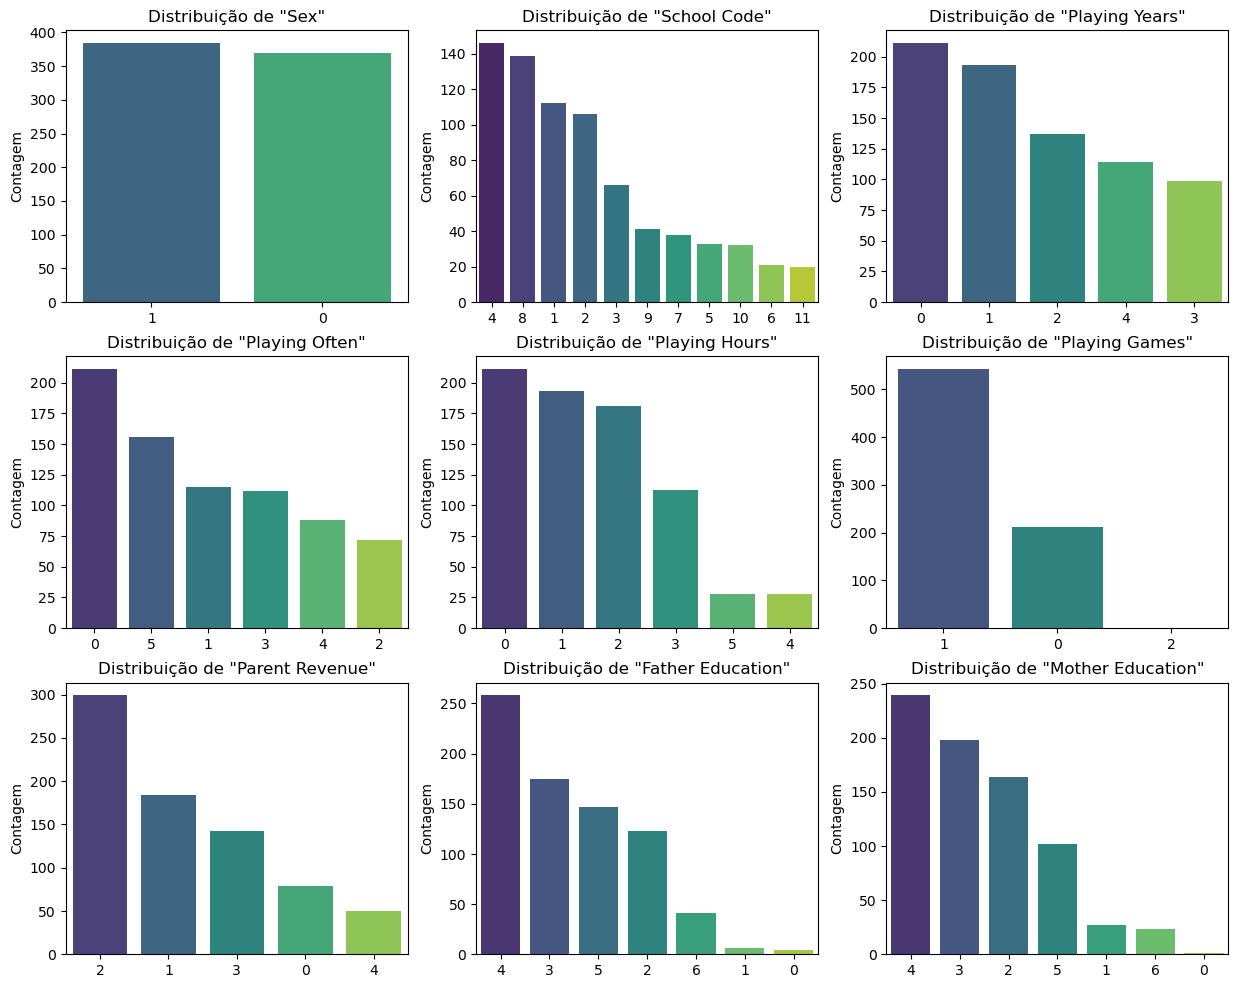

In [13]:
colunas_quantitativas = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, coluna in enumerate(colunas_quantitativas):
    ax = axes.flatten()[i]

    sns.countplot(x=coluna, data=df, ax=ax, palette='viridis', order = df[coluna].value_counts().index)

    ax.set_title(f'Distribuição de "{coluna}"', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Contagem')

Então podemos ver que nossa variável "Sex" representa dados como 0 ou 1, 0 representando o gênero feminino e 1 representando o gênero masculino. 
Nossa variável "School Code" está com dados dividos de 1 a 11 ou seja temos 11 escolas diferentes em nosso dataset. 
Agora nossas variáveis "Playing Years, Playing Often, Playing Hours" representa escalas de quanto tempo em anos jogado, qual a frequência jogando e o tempo diário em horas jogado.
Já a variável "Playing Games" apresenta um problema pois nossa interpretação nela é se o aluno joga (representa 1) ou não (representa 0), então por que temos um valor de 2? Vamos tomar a decisão de excluir essa linha pois ela não segue nossa regra de negócio da nossa variável "Playing Games" fugindo dos valores possíves da mesma e também apresenta uma quantidade de linha muito pequena em relação ao nosso dataset.
A variável "Parente Revenue" mostra pra gente a renda mensal familiar em dólar.
Nossas ultimas variáveis "Father Education", "Mother Education" mostra o nível de escolaridade dos pais numa escala de (0 a 6).

In [14]:
#Excluindo linha da variável "Playing Games" que não segue a regra de negócio
df = df.drop(df[df["Playing Games"] == 2].index)

Vamos definir algumas regras de negócio em nossas variáveis

1 Regra: Em nossa variável "Playing Years" valores igual a 0 representa que o aluno não joga video games por isso não tem anos jogado. Podemos confirmar isso com esse filtro.

In [15]:
df[(df["Playing Years"] == 0) & (df["Playing Games"] == 1)]

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage


2 Regra: Nossa variável "Playing Often" vai ser representada categoricamente dessa forma: 

0: Nunca

1-2: Raramente

3-4: Ocasionalmente

5-6: Frequentemente

In [16]:
df[(df["Playing Often"] == 0) & (df["Playing Games"] == 1)]

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage


E Podemos interpretar também que alunos que tem 0 (Nunca) como "Playing Often", não jogam games.

3 Regra: Nossas variáveis "Father Education" e "Mother Education" vão ser representadas categoricamente dessa forma:

0: Fundamental Incompleto

1: Fundamental Completo

2: Ensino Médio Incompleto

3: Ensino Médio Completo

4: Superior Incompleto

5: Superior Completo

6: Pós-graduação (Mestrado, Doutorado, etc.)

4 Regra: Em nossa variável "Playing Hours" valores igual a 0 representa que o aluno não joga video games por isso não tem horas diárias jogadas. Podemos confirmar isso com esse filtro.

In [17]:
df[(df["Playing Hours"] == 0) & (df["Playing Games"] == 1)]

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage


5 Regra: Na nossa variável "Parent Revenue" valores igual a 0 representa que a familia tem uma renda mensal menor que 1000 doláres.

6 Regra: Vamos transformar nossa variável "Grade" para numérica afim de realizar previsões e medidas estatísticas e excluir a ultima variável "percentage", pois representa a mesma interpretação da variável "Grade".

In [18]:
#Transformando nossa variável "Grade" para numérica e excluindo nossa coluna "percentage"
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')
df.drop(columns = "percentage", inplace = True)
colunas_quantitativas = df.select_dtypes(include=[np.number]).columns #Atualizando as colunas quantitativas

In [19]:
#Verificando se após a transformação da coluna "Grade", algum valor se transformou em valor null
df.isnull().sum()

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               1
dtype: int64

Podemos ver que no processo da transformação um valor da variável "Grade" passou a ser null. Vamos exibir essa linha.

In [20]:
#Exibindo
df[df["Grade"].isnull()]

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
363,0,4,0,0,0,0,2,4,4,NaN


Vamos tomar a decisão de excluir essa linha, pois representa uma quantidade insignificativa em relação ao tamanho do nosso dataset 

In [21]:
#Excluindo linha com valor null
df = df.dropna()

In [22]:
#Verificando após exclusão
df.isnull().sum()

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               0
dtype: int64

In [23]:
depois_tratamento = df.shape[0]

In [24]:
antes_tratamento,depois_tratamento

(770, 752)

In [25]:
antes_tratamento - depois_tratamento

18

Aqui terminamos a etapa de limpeza e transformação dos dados, podemos identificar que antes do tratamento tinhamos 770 linhas agora após o tratamento temos 752 linhas, foram excluidas e tratadas então 18 linhas.

### Partindo agora para a análise exploratoria dos dados.

In [26]:
#Visualizando nosso resumo estatistico
df.describe()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,0.509309,4.882979,1.619681,2.289894,1.518617,0.720745,1.868351,3.700798,3.386968,77.184215
std,0.500246,2.994825,1.403452,1.913858,1.331649,0.448932,1.049993,1.169793,1.165638,16.370026
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,65.000000
50%,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,3.000000,80.000000
75%,1.000000,8.000000,3.000000,4.000000,2.000000,1.000000,3.000000,4.250000,4.000000,90.000000
max,1.000000,11.000000,4.000000,5.000000,5.000000,1.000000,4.000000,6.000000,6.000000,100.000000


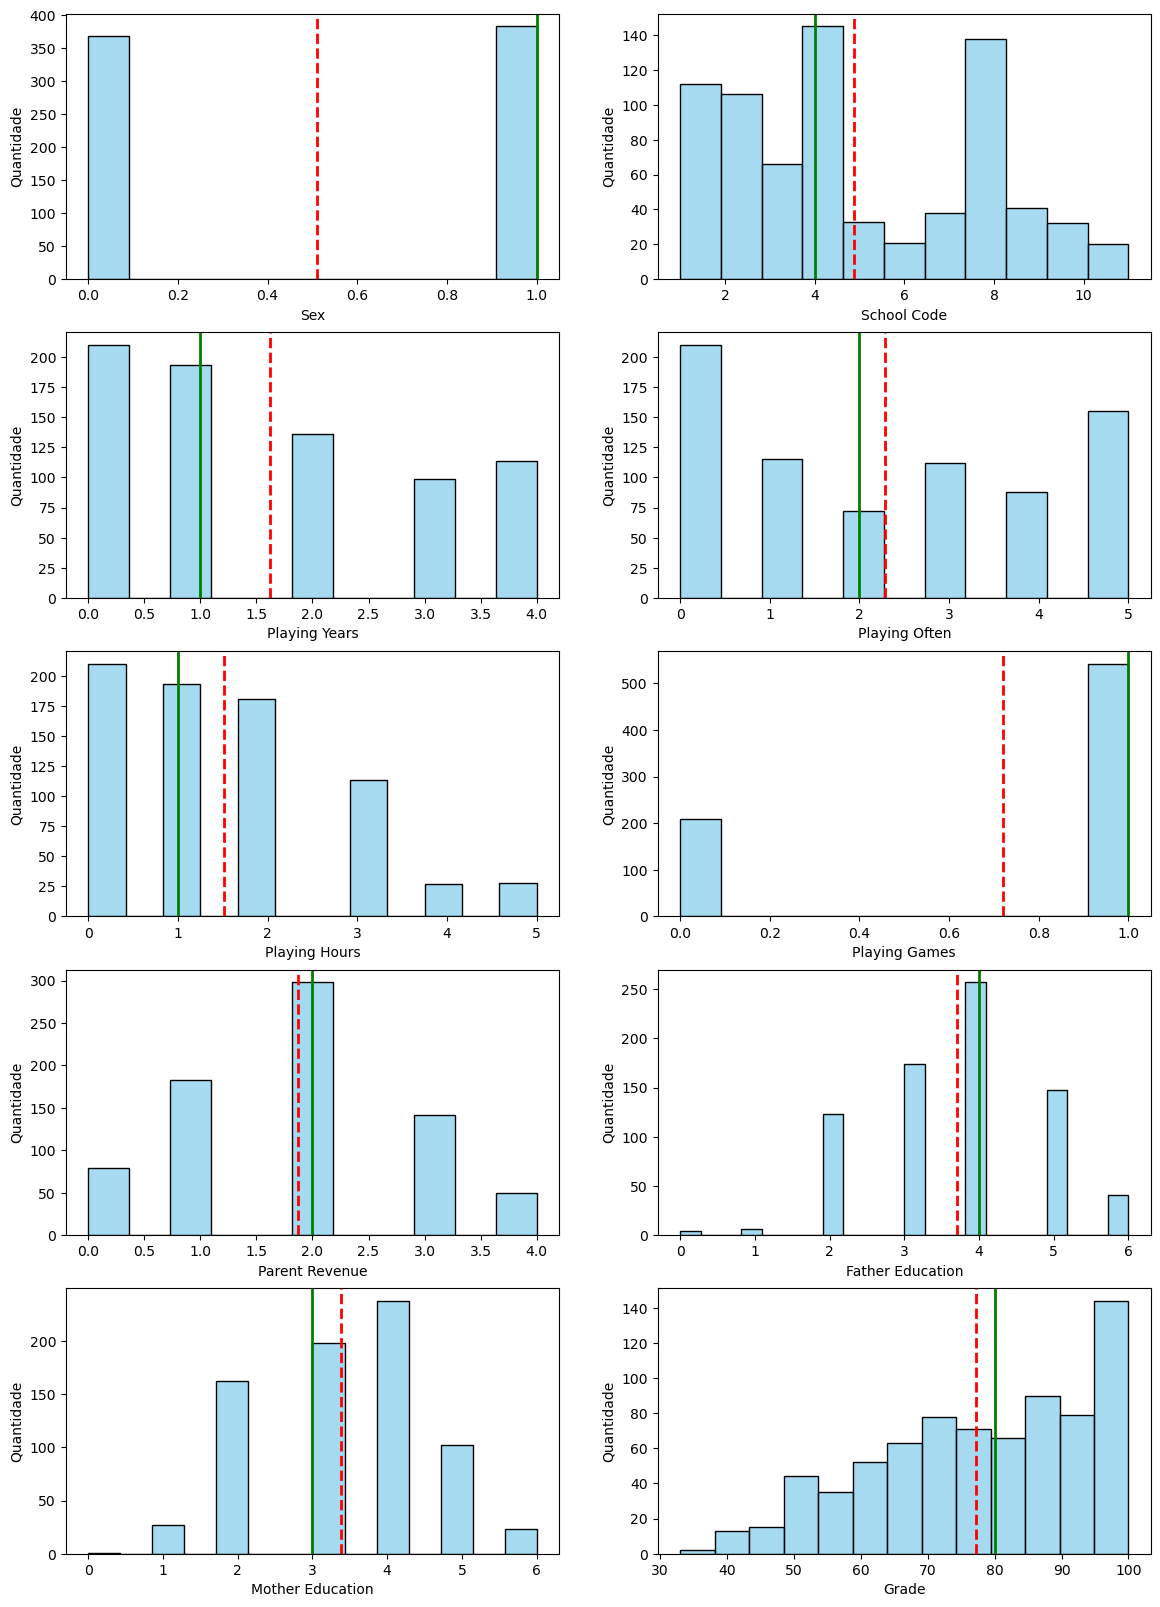

In [27]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))

for ax, coluna in zip(axes.flatten(), colunas_quantitativas):
    dados_coluna = df[coluna]
    media = dados_coluna.mean()
    mediana = dados_coluna.median()

    sns.histplot(dados_coluna, ax=ax, color='skyblue')

    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media:.2f}')
    ax.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
    ax.set_ylabel("Quantidade")

Estamos verificando nesses gráficos o qual perto a nossa mediana está em relação a média. Para que podemos analisar a variáveis pela medida da mediana

In [28]:
#Verificando a dipersão dos dados em cada variável

func_cv = lambda dp, media: (dp/media) * 100

resultados_cv = [func_cv(df[coluna].std(), df[coluna].mean()) for coluna in colunas_quantitativas]

In [29]:
for nome_coluna, resultado_coluna in zip(colunas_quantitativas, resultados_cv):
    print(f"A Variavel {nome_coluna} apresenta um coeficiente de variação de {resultado_coluna:.2f}")

A Variavel Sex apresenta um coeficiente de variação de 98.22
A Variavel School Code apresenta um coeficiente de variação de 61.33
A Variavel Playing Years apresenta um coeficiente de variação de 86.65
A Variavel Playing Often apresenta um coeficiente de variação de 83.58
A Variavel Playing Hours apresenta um coeficiente de variação de 87.69
A Variavel Playing Games apresenta um coeficiente de variação de 62.29
A Variavel Parent Revenue apresenta um coeficiente de variação de 56.20
A Variavel Father Education apresenta um coeficiente de variação de 31.61
A Variavel Mother Education apresenta um coeficiente de variação de 34.42
A Variavel Grade apresenta um coeficiente de variação de 21.21


Muitas variáveis apresentou grande dispersão, porém como estamos lidando com variáveis onde se tem uma escala de valores. Exemplo a variável "School Code" tem valores de (1 a 11) com uma média de 4,5 é completamente normal o alto valor do coeficiente pois os códigos da escola estão distribuídos e porque tem muitas escolas (11).

In [30]:
#Verificando qual a moda de cada coluna
#Moda é o valor que mais aparece na coluna da variável
for coluna in colunas_quantitativas:
    moda = df[coluna].mode()[0]
    print(f"A moda da variável {coluna} é igual a: {moda}")

A moda da variável Sex é igual a: 1
A moda da variável School Code é igual a: 4
A moda da variável Playing Years é igual a: 0
A moda da variável Playing Often é igual a: 0
A moda da variável Playing Hours é igual a: 0
A moda da variável Playing Games é igual a: 1
A moda da variável Parent Revenue é igual a: 2
A moda da variável Father Education é igual a: 4
A moda da variável Mother Education é igual a: 4
A moda da variável Grade é igual a: 100.0


Então já podemos tirar certas conclusões com a moda, em nosso dataset temos mais alunos do genêro masculino, alunos da escola código 4 são os que mais aparecem, temos mais alunos que jogam games, muitas familias tem renda mensal de 2000 doláres e os pais dos alunos ingressam no ensino superior, mas não terminaram e temos a maior quantidade de aluno com desempenho de 100% na escola.

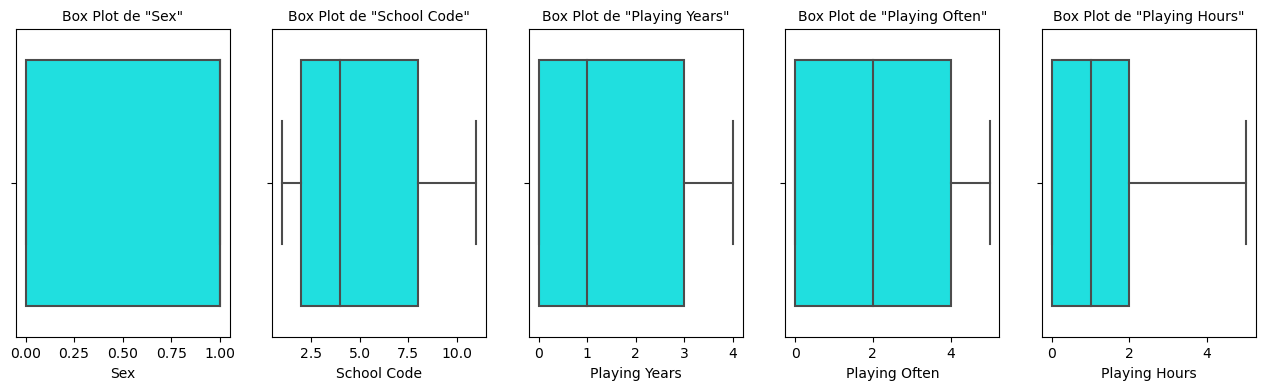

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

for ax, coluna in zip(axes.flatten(), colunas_quantitativas):
    sns.boxplot(x=df[coluna], ax=ax, color='cyan', orient='h')
    ax.set_title(f'Box Plot de "{coluna}"', fontsize=10)

In [32]:
colunas_quantitativas2 = colunas_quantitativas[5:].copy()

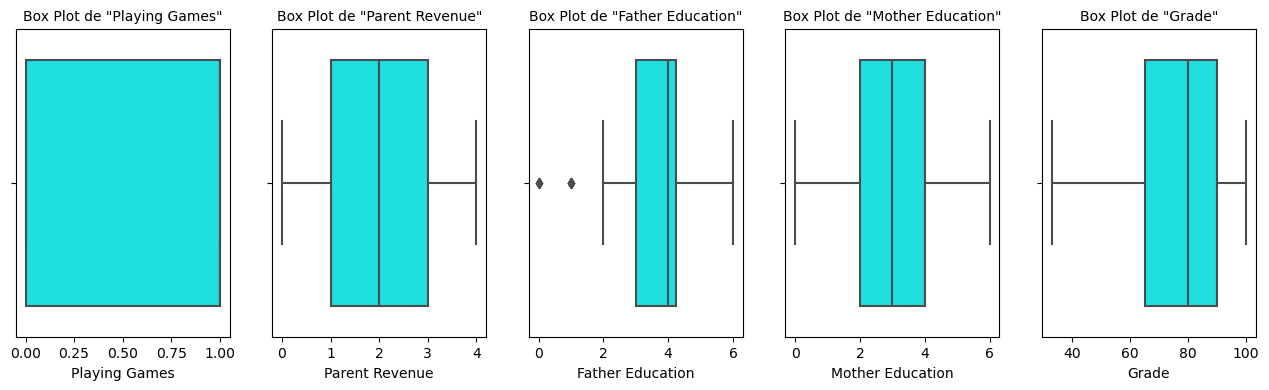

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

for ax, coluna in zip(axes.flatten(), colunas_quantitativas2):
    sns.boxplot(x=df[coluna], ax=ax, color='cyan', orient='h')
    ax.set_title(f'Box Plot de "{coluna}"', fontsize=10)

Interpretando o boxplot das variáveis. As variáveis "Playing Games" e "Sex" como são dados binários (0 e 1), consequentemente todos os dados estão dentro da "caixa" entre o primeiro quartil e o terceiro quartil. Podemos identificar que somente na variável "Father Education" apresenta valores outliers, que nesse caso estão ultrapassando o minímo da caixa dado por 
(Q1 - 1,5 * (Q3-Q1)). Porém minha decisão é de manter esse outlier, que conceitualmente não apresenta um erro ou um valor estatistico muito extremo, mas sim um caso real que pode ter validade, pois algum pai pode não ter completado o ensino fundamenal é super válido essa suposição no mundo real, então vou aceitar esse "outlier".

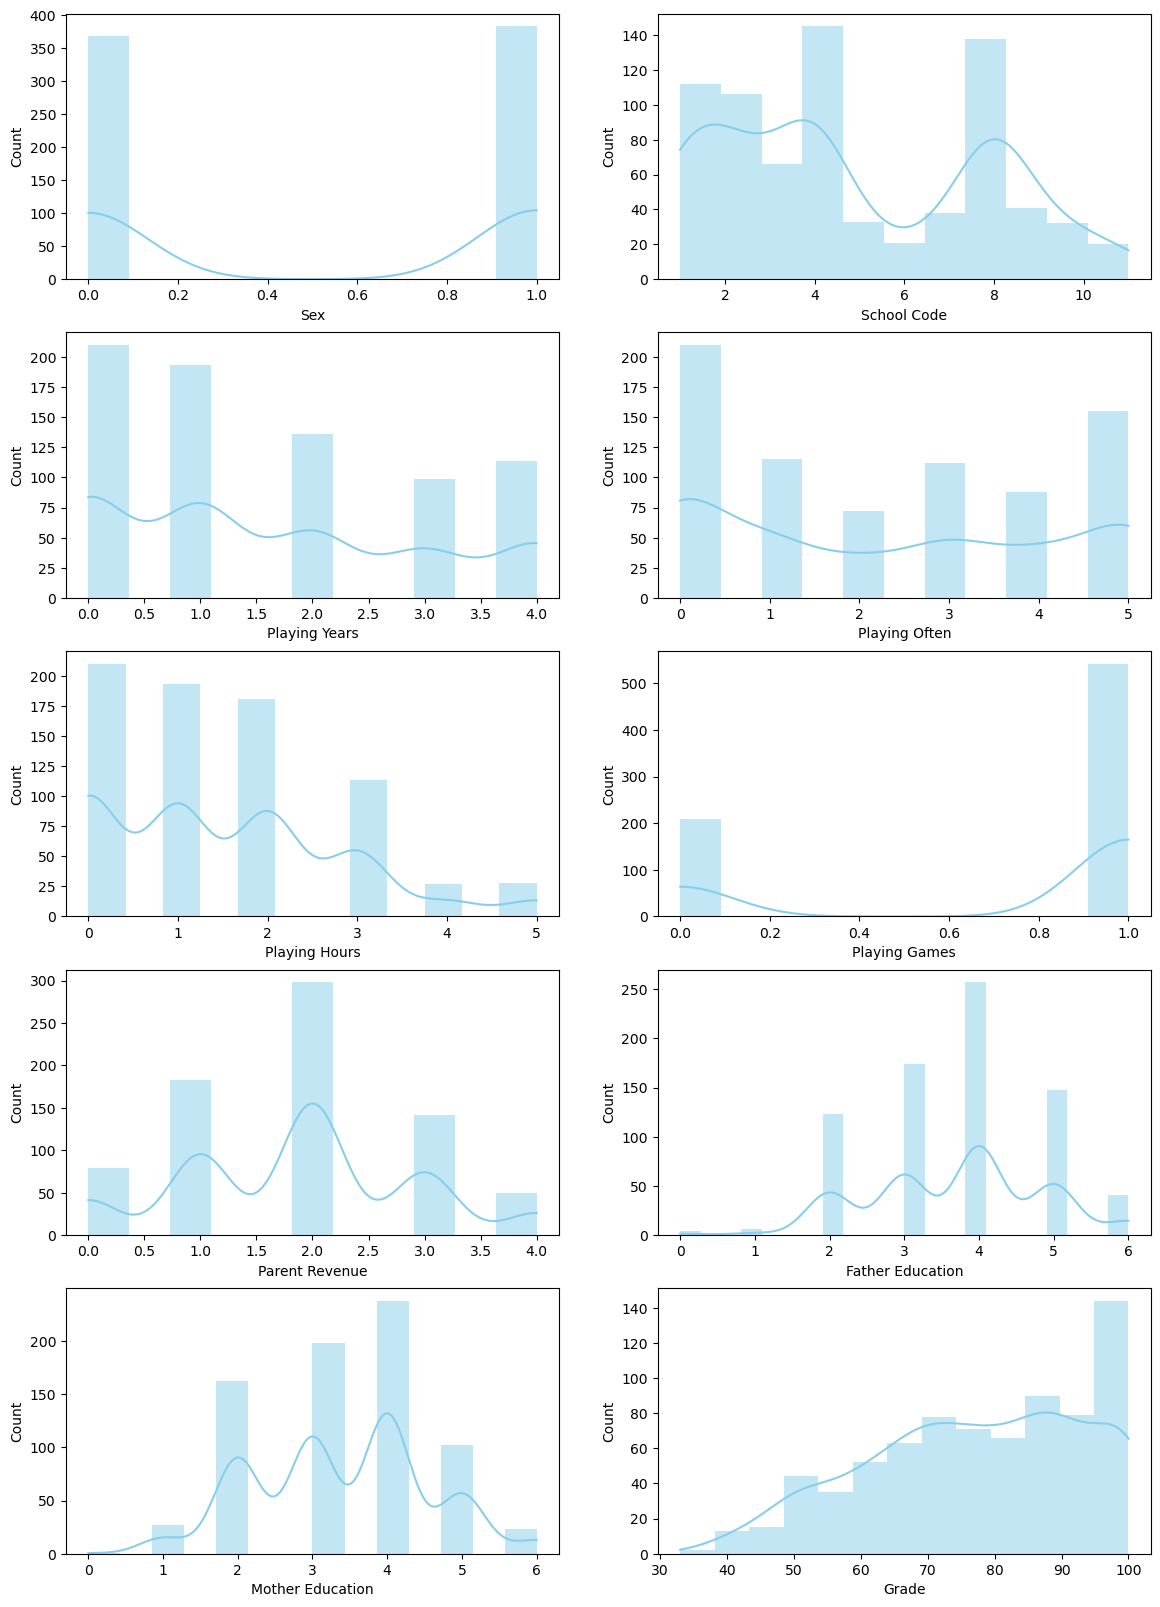

In [34]:
#Verificando a distribuição dos dados nas variáveis pela curva de gauss
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
for ax, coluna in zip(axes.flatten(), colunas_quantitativas):
    dados_coluna = df[coluna]
    sns.histplot(dados_coluna, kde=True, ax=ax, color='skyblue', linewidth=0)

In [35]:
for coluna in colunas_quantitativas:
    k_teste, p_teste = shapiro(df[coluna])
    nivel_de_significancia = 0.05
    if p_teste > nivel_de_significancia:
        print(f"Nossa variável {coluna} com um p-value de {p_teste:.2f} passou no teste de normalidade")
    print(f"Nossa variável {coluna} com um p-value de {p_teste:.2f} menor que 0.05 não passou no teste de normalidade")

Nossa variável Sex com um p-value de 0.00 menor que 0.05 não passou no teste de normalidade
Nossa variável School Code com um p-value de 0.00 menor que 0.05 não passou no teste de normalidade
Nossa variável Playing Years com um p-value de 0.00 menor que 0.05 não passou no teste de normalidade
Nossa variável Playing Often com um p-value de 0.00 menor que 0.05 não passou no teste de normalidade
Nossa variável Playing Hours com um p-value de 0.00 menor que 0.05 não passou no teste de normalidade
Nossa variável Playing Games com um p-value de 0.00 menor que 0.05 não passou no teste de normalidade
Nossa variável Parent Revenue com um p-value de 0.00 menor que 0.05 não passou no teste de normalidade
Nossa variável Father Education com um p-value de 0.00 menor que 0.05 não passou no teste de normalidade
Nossa variável Mother Education com um p-value de 0.00 menor que 0.05 não passou no teste de normalidade
Nossa variável Grade com um p-value de 0.00 menor que 0.05 não passou no teste de norma

Podemos verificar que nenhuma das nossas variáveis assumem uma normalização dos dados, isso vai influenciar na escolha das ferramentas estatisticas que vamos usar de agora em diante.
Com isso chegamos ao final da nossa analise exploratória dos dados.

<AxesSubplot:>

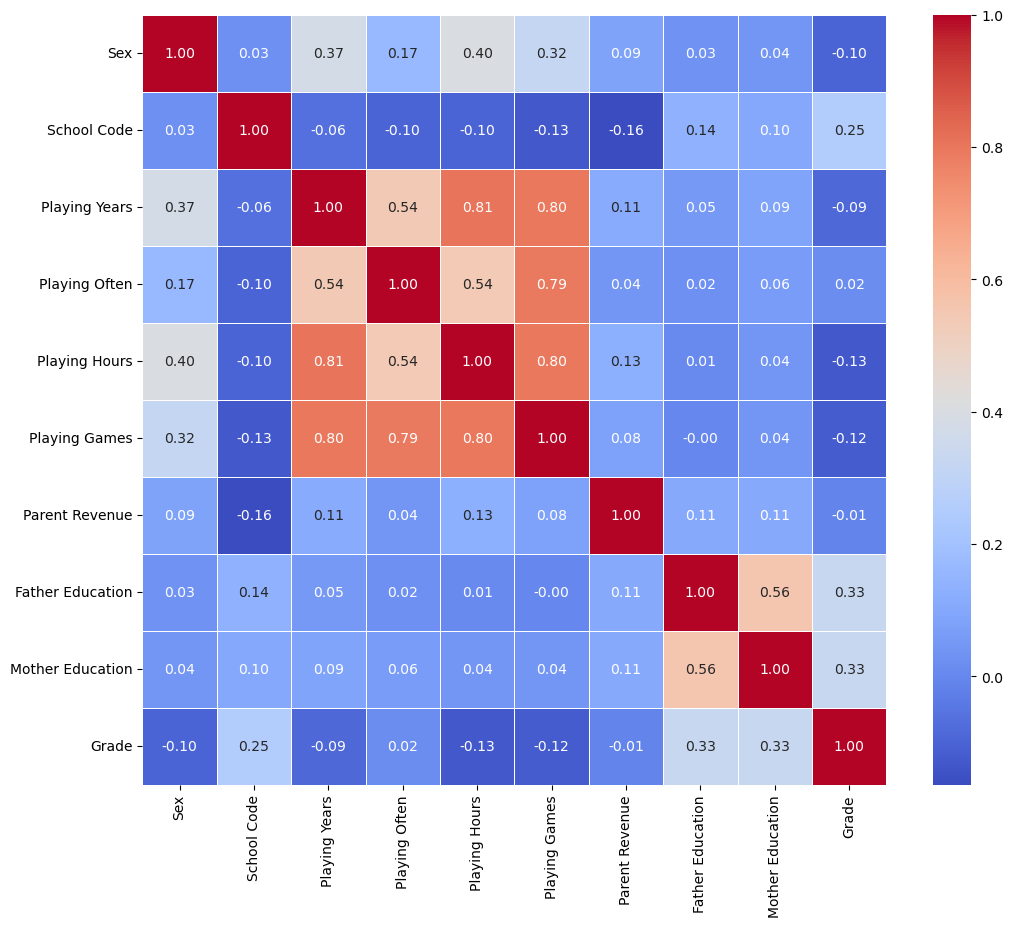

In [36]:
#Aplicando teste de correlação
corr_matrix = df.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

<AxesSubplot:>

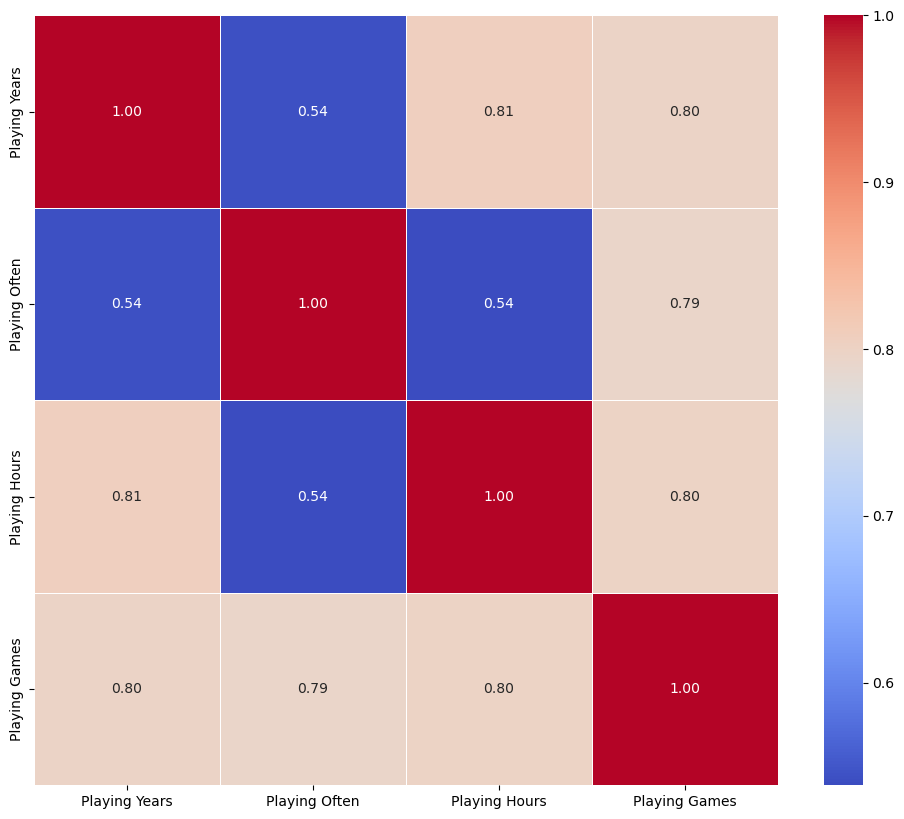

In [37]:
#Separando somente pelas variáveis que deram forte correlação
corr_strengh = ["Playing Years","Playing Often", "Playing Hours", "Playing Games"]
corr_matrix = df[corr_strengh].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

In [38]:
#Agora verificando se as correlações são significativamente estatísticas
for var1,var2 in itertools.combinations(corr_strengh, 2):
    
    corr, p_valor = spearmanr(df[var1], df[var2])

    print(f"Correlação entre '{var1}' e '{var2}': {corr:.4f}")
    print(f"P-valor: {p_valor:.4f}")
    if p_valor <= 0.05:
        print("Conclusão: A correlação é estatisticamente significativa.\n")
    else:
        print("Conclusão: A correlação NÃO é estatisticamente significativa.\n")

Correlação entre 'Playing Years' e 'Playing Often': 0.5438
P-valor: 0.0000
Conclusão: A correlação é estatisticamente significativa.

Correlação entre 'Playing Years' e 'Playing Hours': 0.8062
P-valor: 0.0000
Conclusão: A correlação é estatisticamente significativa.

Correlação entre 'Playing Years' e 'Playing Games': 0.7974
P-valor: 0.0000
Conclusão: A correlação é estatisticamente significativa.

Correlação entre 'Playing Often' e 'Playing Hours': 0.5384
P-valor: 0.0000
Conclusão: A correlação é estatisticamente significativa.

Correlação entre 'Playing Often' e 'Playing Games': 0.7930
P-valor: 0.0000
Conclusão: A correlação é estatisticamente significativa.

Correlação entre 'Playing Hours' e 'Playing Games': 0.7998
P-valor: 0.0000
Conclusão: A correlação é estatisticamente significativa.



Então vamos concluir agora que nossas variávies com fortes correlações são "Playing Years" e "Playing Hours", "Playing Years" e "Playing Games", "Playing Often" e "Playing Games", "Playing Hours" e "Playing Games." Todas elas correlações forte positivas ou seja a medida que uma tende a subir a outra também tende a subir e todas são estasticamente significativas.

Observação: Usamos o teste de correlação de spearman pois nossas variáveis não seguem uma distribuição normal.

In [39]:
#Criação de novas variáveis
#Family Education vai ser criada com base na média de estudo do pai e da mãe

df["Family Education"] = round((df["Father Education"] + df["Mother Education"]) / 2)
df.drop(columns=["Father Education","Mother Education"], inplace = True)

### Agora vamos responder as perguntas de negócio

In [40]:
#Qual o gênero que mais jogam games?
#Vamos filtrar apenas alunos que jogam e depois agrupar por gênero
df_resposta1 = df[df["Playing Games"] == 1].copy()
df_resposta1["Sex"] = np.where(df_resposta1["Sex"] == 1 ,"Masculino", "Feminino")

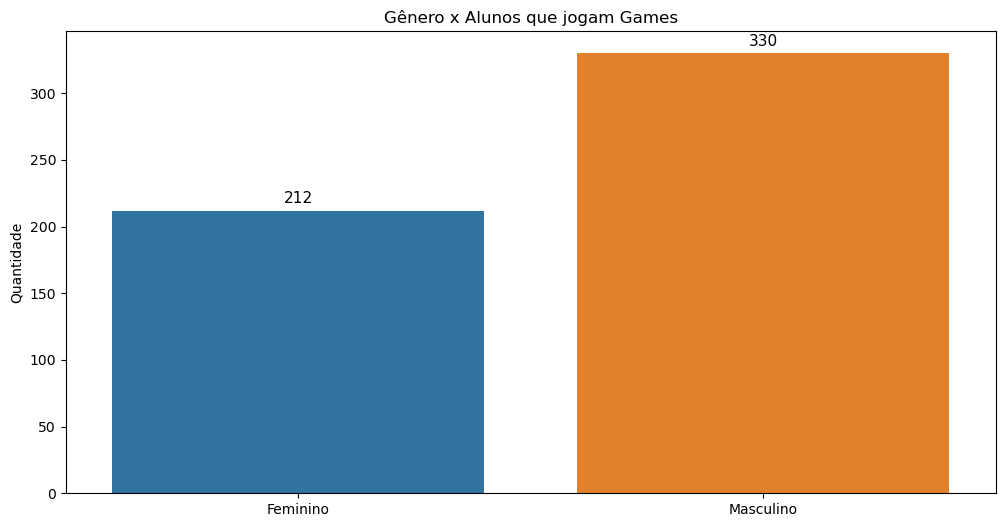

In [41]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df_resposta1["Sex"])
ax.bar_label(ax.containers[0], fontsize=11, color="black", padding=3)
plt.ylabel("Quantidade")
plt.xlabel("")
plt.title("Gênero x Alunos que jogam Games")
plt.show()

O gênero que mais jogam games é o masculino com exatamente 330 alunos já o gênero feminino com 212 alunas.

In [42]:
#Qual escola obtem mais alunos com mais anos jogados em games?
#Vamos filtrar apenas alunos que jogam games depois agrupar por escola (a quantidade de aluno e a mediana de anos jogado)
df_aux = df[df["Playing Games"] == 1].copy()
df_resposta2 = df_aux.groupby("School Code")["Playing Years"].agg(["count","median"]).sort_values(by="median", ascending = False).reset_index()
df_resposta2.rename(columns = {"count":"Alunos","median":"Anos Jogado","School Code": "Escola"}, inplace = True)

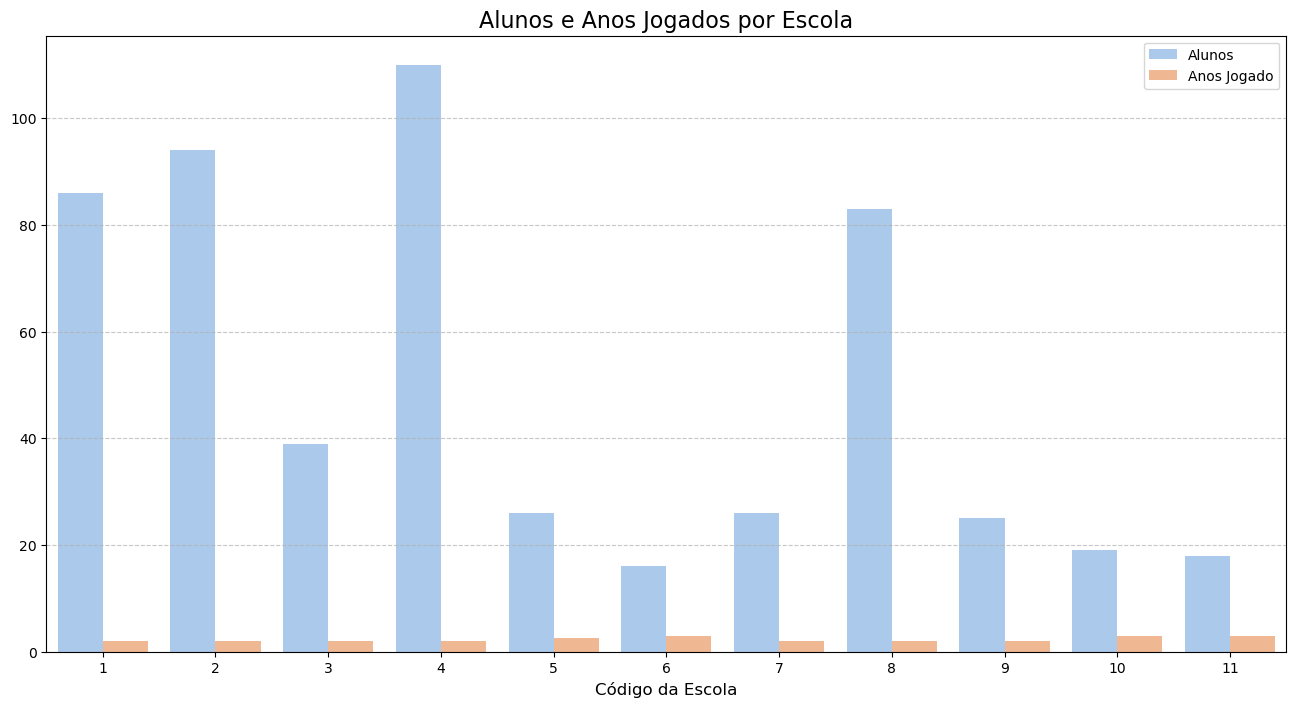

In [43]:
df_metricas = pd.melt(df_resposta2, id_vars=["Escola"],value_vars=["Alunos", "Anos Jogado"],var_name="Metrica", value_name="Valor_Bruto")
plt.figure(figsize=(16, 8))
sns.barplot(x="Escola", y="Valor_Bruto", hue="Metrica", data=df_metricas, palette="pastel")

plt.title("Alunos e Anos Jogados por Escola", fontsize=16)
plt.xlabel("Código da Escola", fontsize=12)
plt.ylabel("", fontsize=12)
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [44]:
df_resposta2

,Escola,Alunos,Anos Jogado
0,6,16,3.0
1,10,19,3.0
2,11,18,3.0
3,5,26,2.5
4,1,86,2.0
5,2,94,2.0
6,3,39,2.0
7,4,110,2.0
8,7,26,2.0
9,8,83,2.0


A Escola que obtém de mais alunos com mais anos jogados em games é a escola código 4, portanto a escola que obtém alunos com a melhor mediana em anos jogados são as 6, 10 e 11.

In [45]:
#Qual escola obtem mais alunos que não jogam games?
#Vamos filtrar apenas por alunos que não jogam games e logo depois agrupar por escola
df_resposta3 = df[df["Playing Games"] == 0].copy()

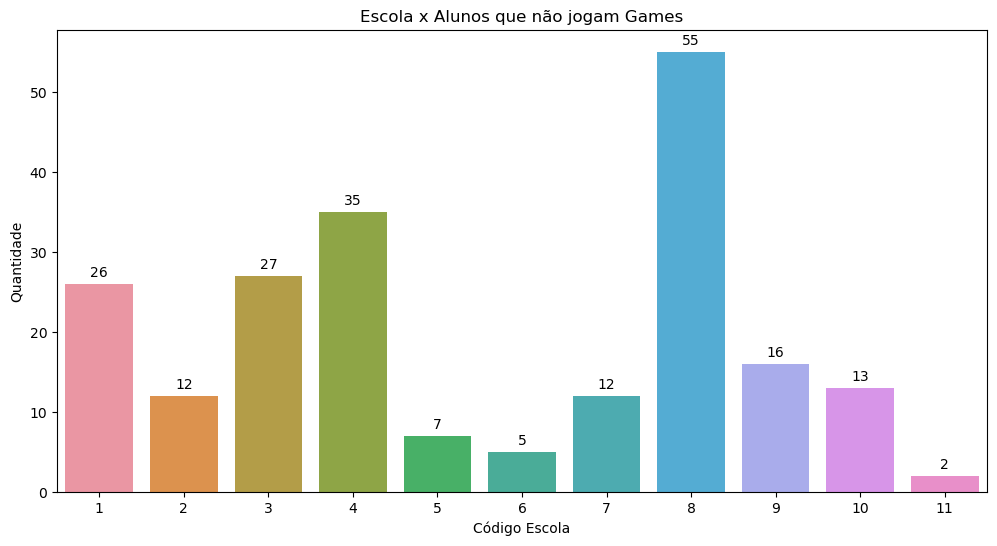

In [46]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df_resposta3["School Code"])
ax.bar_label(ax.containers[0], fontsize=10, color="black", padding=3)
plt.ylabel("Quantidade")
plt.xlabel("Código Escola")
plt.title("Escola x Alunos que não jogam Games")
plt.show()

Pelo gráfico podemos interpretar que a escola de código 8 tem a maior quantidade de alunos que não jogam games.

In [47]:
#Qual escola obtem mais alunos com os melhores desempenhos escolares?
#Vamos agrupar por escola a (quantidade de alunos e média de desempenho)
df_resposta4 = df.groupby("School Code")["Grade"].agg(["count","mean"]).sort_values(by="mean",ascending = False).reset_index()
df_resposta4.rename(columns = {"School Code":"Escola","count":"Quantidade de Aluno","mean":"Média de desempenho"},inplace=True)
df_resposta4["Média de desempenho"] = round(df_resposta4["Média de desempenho"])

In [48]:
df_resposta4

,Escola,Quantidade de Aluno,Média de desempenho
0,7,38,97.0
1,6,21,96.0
2,9,41,94.0
3,5,33,93.0
4,10,32,77.0
5,8,138,75.0
6,11,20,75.0
7,4,145,73.0
8,2,106,73.0
9,1,112,73.0


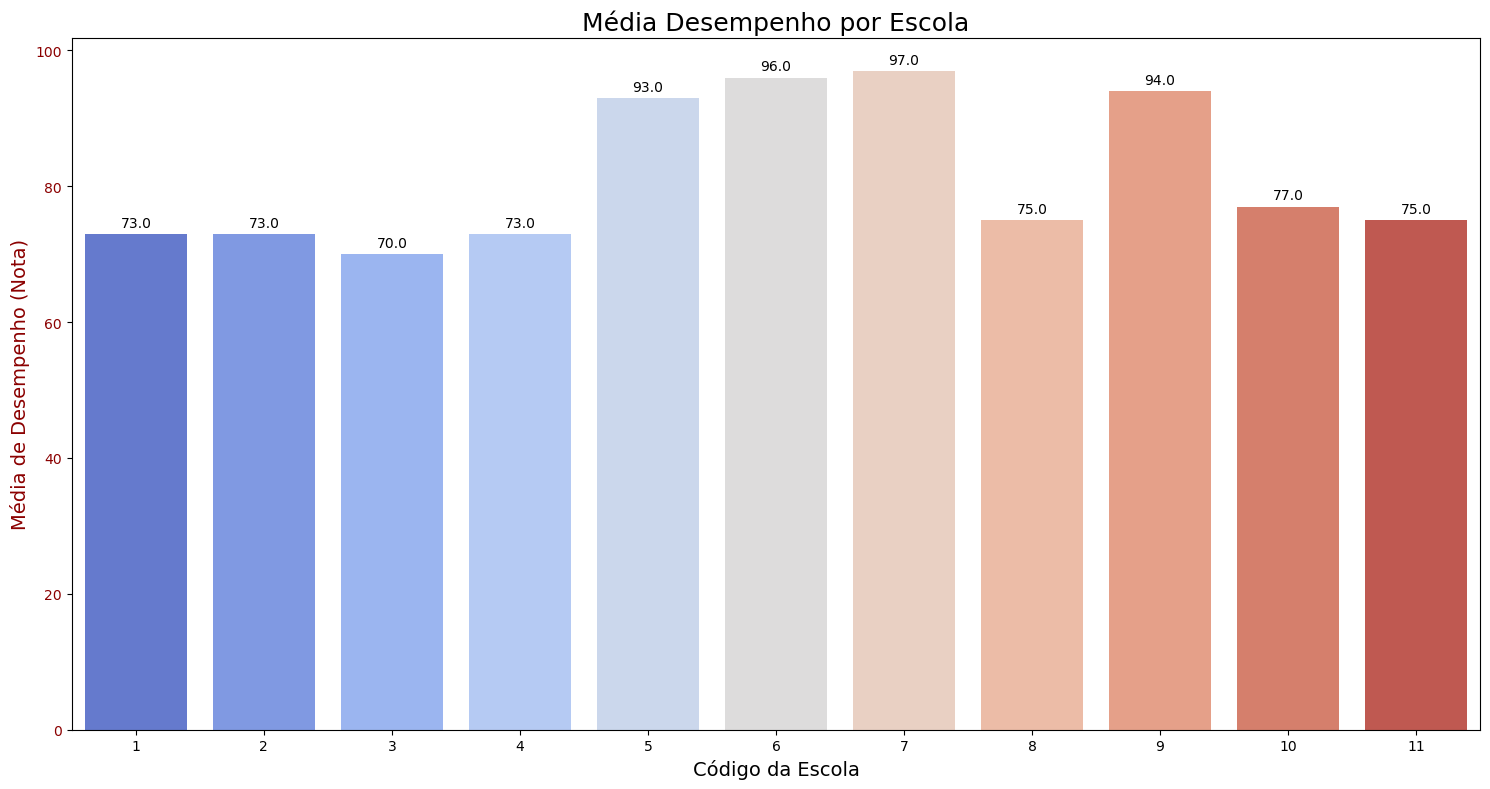

In [49]:
fig, ax4 = plt.subplots(figsize=(15, 8))


sns.barplot(x="Escola", y="Média de desempenho", data=df_resposta4, ax=ax4, palette="coolwarm", label="Média de Desempenho")
ax4.set_xlabel("Código da Escola", fontsize=14)
ax4.set_ylabel("Média de Desempenho (Nota)", color="darkred", fontsize=14)
ax4.tick_params(axis="y", labelcolor="darkred")


for container in ax4.containers:
    ax4.bar_label(container, fmt="%.1f", fontsize=10, padding=3)

plt.title("Média Desempenho por Escola", fontsize=18)
fig.tight_layout()
plt.show()

A Escola com a melhor média de desempenho é a de código 7, com uma quantidade de 38 alunos.

In [50]:
#Alunos que recentemente começaram a jogar tendem a passar mais tempo diário jogando?
#Vamos fazer a relação de anos jogados e tempo diário jogados por alunos

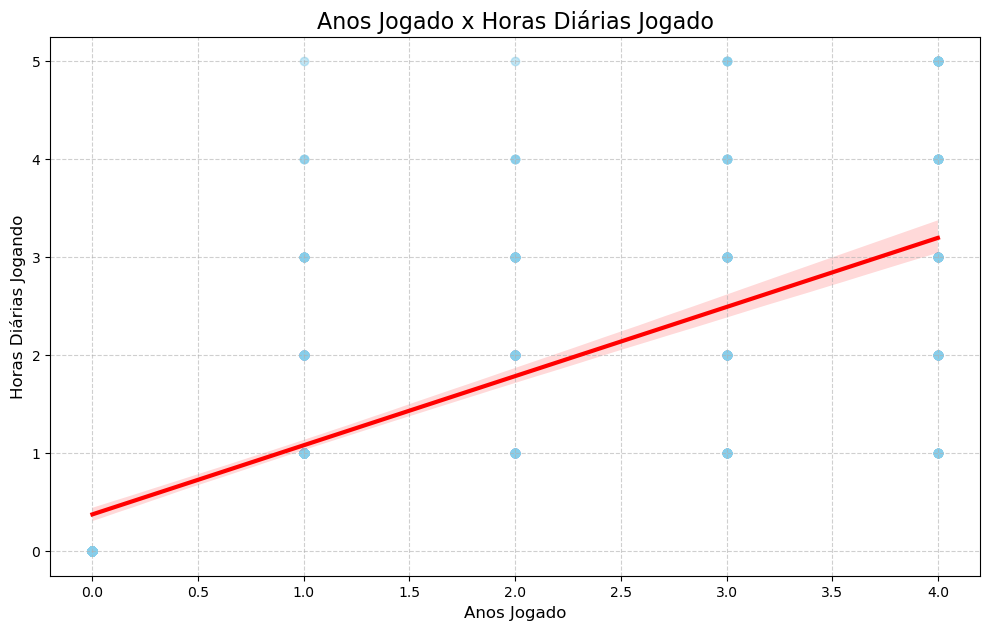

In [51]:
plt.figure(figsize=(12, 7))

sns.regplot(
    data=df,
    x="Playing Years",
    y="Playing Hours",
    scatter_kws={"alpha":0.5, "color": "skyblue"}, 
    line_kws={"color":"red", "linewidth": 3}    
)
plt.title("Anos Jogado x Horas Diárias Jogado", fontsize=16)
plt.xlabel("Anos Jogado", fontsize=12)
plt.ylabel("Horas Diárias Jogando", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Nossa interpretação nesse caso é ao contrário, em nosso cénario alunos que já jogam há muitos anos tendem a passar mais tempo diário jogando.

In [52]:
#A Renda parental influência no fato do aluno jogar com frequencia mais games?
#Vamos analisar conforme for a renda parental qual a frequência jogando

In [53]:
mapeamento = {
0:"Nunca",
1:"Raramente",
2:"Raramente",   
3:"Ocasionalmente",
4:"Ocasionalmente",
5:"Frequentemente",
6:"Frequentemente"
}
df_resposta6 = df.copy()
df_resposta6["Playing Often Categorical"] = df["Playing Often"].map(mapeamento)

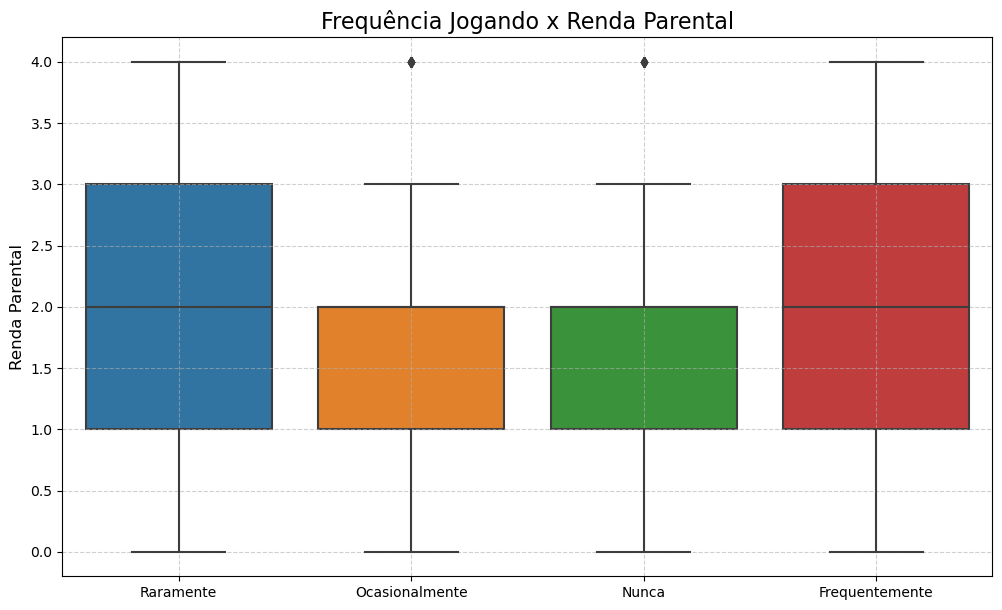

In [54]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_resposta6, x="Playing Often Categorical", y="Parent Revenue")
plt.title("Frequência Jogando x Renda Parental", fontsize=16)
plt.xlabel("", fontsize=12)
plt.ylabel("Renda Parental", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Não podemos concluir essa afirmação de que a renda parental influencia no fato do aluno jogar com frequência, pois podemos visualizar que uma renda parental entre 1000 doléres e 3000 doláres são agrupadas por alunos que jogam frequetemente e alunos que raramente jogam.

In [55]:
#Alunos que não jogam games tendem a ter um desempenho melhor na escola
#Vamos analisar a relação dos alunos que jogam e não jogam com o seu desempenho escolar
mapeamento2 = {
0:"Não",
1:"Sim",
}
df_resposta7 = df.copy()
df_resposta7["Playing Games Categorical"] = df["Playing Games"].map(mapeamento2)

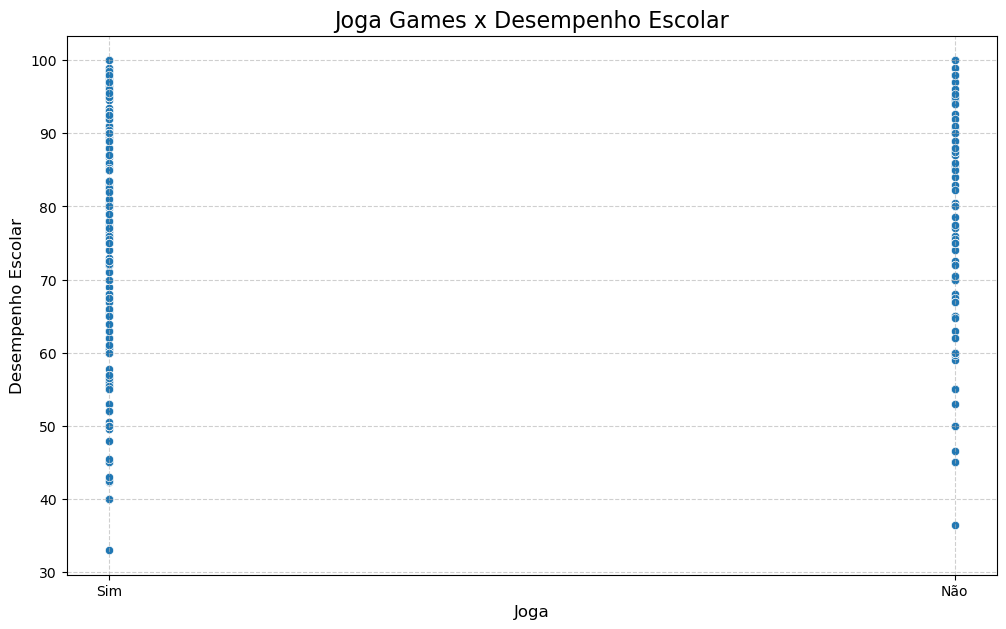

In [56]:
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df_resposta7,
    x="Playing Games Categorical",
    y="Grade")
plt.title("Joga Games x Desempenho Escolar", fontsize=16)
plt.xlabel("Joga", fontsize=12)
plt.ylabel("Desempenho Escolar", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Não temos nenhuma relação de que o fato do aluno jogar ou não, influencia seu desempenho escolar.

In [57]:
#O nível de escolaridade da mãe e do pai influência se o aluno joga games?

In [58]:
mapeamento3 = {
0:"Fundamental Incompleto",
1:"Fundamental Completo",
2:"Ensino Médio Incompleto",
3:"Ensino Médio Completo",
4:"Superior Incompleto",
5:"Superior Completo",
6:"Pós-graduação"
}
df_resposta8 = df.copy()
df_resposta8["Family Education Categorical"] = df["Family Education"].map(mapeamento3)

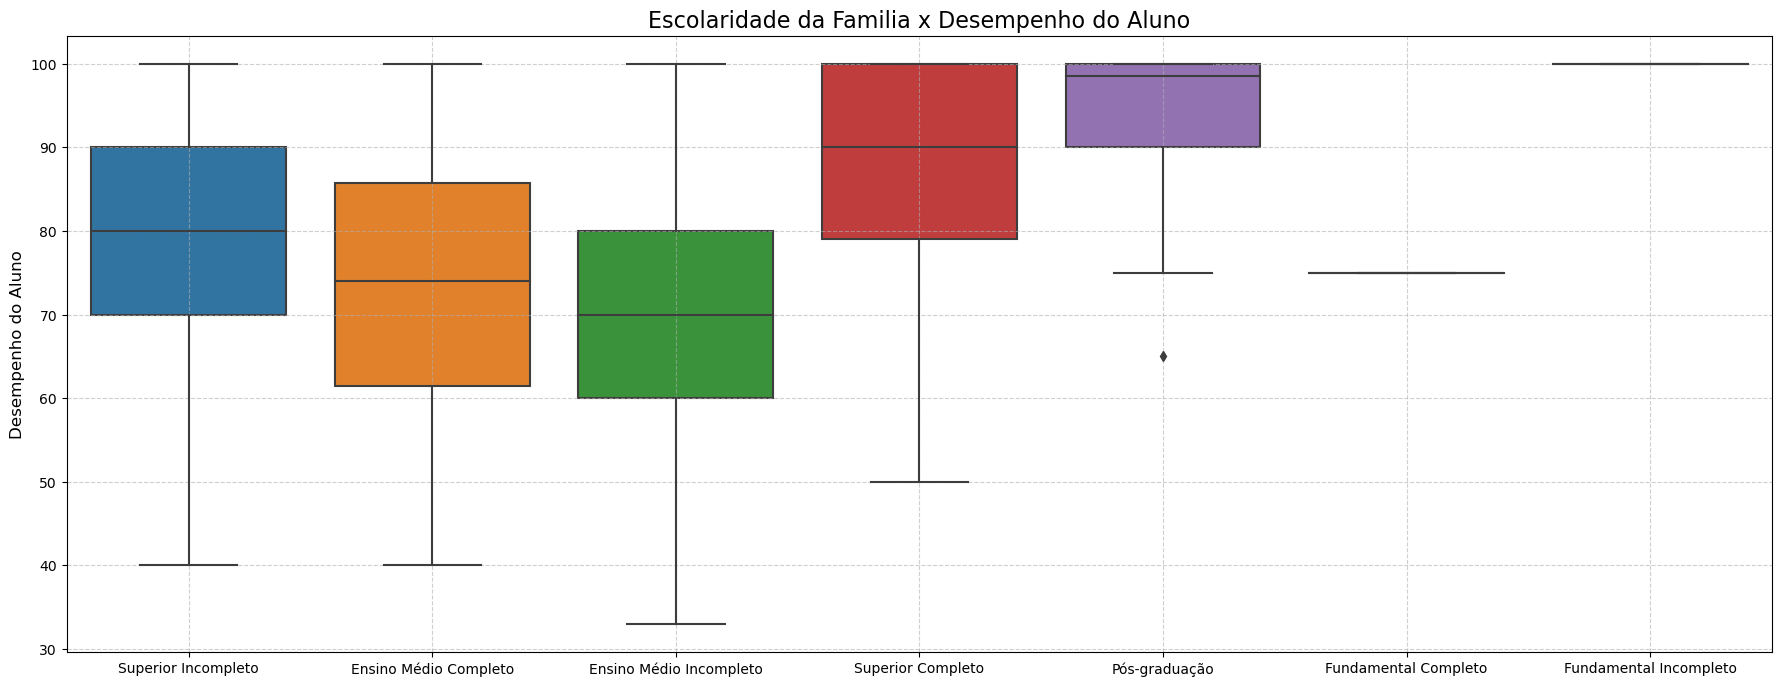

In [59]:
plt.figure(figsize=(22, 8))
sns.boxplot(data=df_resposta8, x="Family Education Categorical", y="Grade")
plt.title("Escolaridade da Familia x Desempenho do Aluno", fontsize=16)
plt.xlabel("", fontsize=12)
plt.ylabel("Desempenho do Aluno", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [60]:
df_resposta8[df_resposta8["Family Education Categorical"] == "Fundamental Completo"]

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Grade,Family Education,Family Education Categorical
589,0,8,0,0,0,0,1,75.0,1.0,Fundamental Completo


In [61]:
df_resposta8[df_resposta8["Family Education Categorical"] == "Fundamental Incompleto"]

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Grade,Family Education,Family Education Categorical
754,0,5,0,0,0,0,0,100.0,0.0,Fundamental Incompleto


Sim o nível de escolaridade da familia influência no fato do aluno ter melhor desempenho na escola, podemos notar que familias com iniciativas em ensino superiores tem metade dos alunos com desempenho maior que 80% na escola. Principalmente alunos com uma escolaridade familiar de "Pós Graduação" tem um desempenho mínimo de 75% na escola, só podemos identificar um caso onde esse desempenho é menor (outlier).

Testando e avaliando um modelo de (regressão linear multipla) para prever o desempendo do aluno conforme as variáveis dependentes:

In [76]:
# Separando variáveis independentes e dependentes
x = df[["Playing Years","Playing Often","Playing Hours","Playing Games","Parent Revenue","Family Education"]].copy()
y = df["Grade"].copy()

In [77]:
# Dividindo dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    x,                      
    y,                      
    test_size=0.25,
    random_state=42         
)

In [78]:
X_const_treino = sm.add_constant(X_treino)

In [79]:
modelo = sm.OLS(y_treino,X_const_treino).fit()

In [80]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     18.56
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           1.01e-19
Time:                        11:06:40   Log-Likelihood:                -2322.6
No. Observations:                 564   AIC:                             4659.
Df Residuals:                     557   BIC:                             4689.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               63.0451      2.560  

Nosso coeficiente de determinação horrível, nosso modelo não tem poder explicativo.
Vamos remover algumas variáveis que apresentaram o p-valor maior que 0.05, pois ela não representa uma variável causal no nosso Y (desempenho do aluno)

In [82]:
x1 = df[["Playing Often","Playing Games","Family Education"]].copy()
y1 = df["Grade"].copy()

In [84]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
    x1,                      
    y1,                      
    test_size=0.25,
    random_state=42         
)

In [85]:
X_const_treino1 = sm.add_constant(X_treino)

In [86]:
modelo2 = sm.OLS(y_treino,X_const_treino1).fit()

In [87]:
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     36.17
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           2.24e-21
Time:                        11:11:37   Log-Likelihood:                -2324.0
No. Observations:                 564   AIC:                             4656.
Df Residuals:                     560   BIC:                             4673.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               61.7232      2.367  

Bom mesmo removendo variáveis que não apresentaram uma significância na variável Y, nosso modelo não tem poder explicativo, ou seja a variabilidade das variáveis independentes não explicam a nossa variável dependente. Vamos prever os dados de teste, só para calcularmos os resíduos e confirmar essa afirmação

In [88]:
X_const_teste = sm.add_constant(X_teste)

In [90]:
y_previsto = modelo2.predict(X_const_teste)

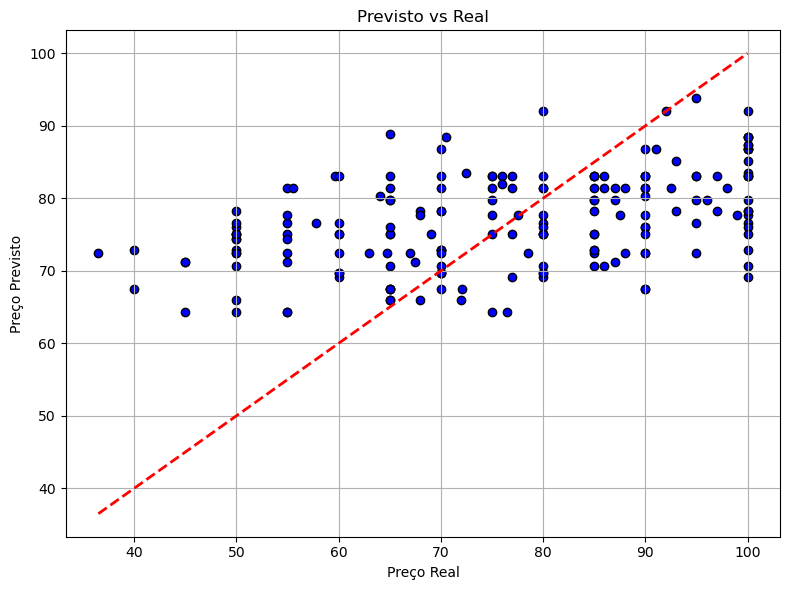

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(y_teste, y_previsto, color='blue', edgecolors='k')
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'r--', lw=2)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Previsto vs Real")
plt.grid(True)
plt.tight_layout()
plt.show()